In [ ]:
import pandas as pd
import requests as rq
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
site = rq.get('http://www.in.gov.br/en/web/dou/-/ato-cotepe/pmpf-n-22-de-9-de-julho-de-2020-266121128')

if site.status_code == 200:
    print('Requisição bem sucedida!')
    content = site.content

Requisição bem sucedida!


In [ ]:
soup = BeautifulSoup(content, 'html.parser')
table = soup.find_all('table')

In [ ]:
table_str = str(table)
confaz = pd.read_html(table_str)[0]


confaz.rename(columns={'Unnamed: 0':'Contador', 'Unnamed: 1':'UF', 
                       'Unnamed: 2':'GAC', 'Unnamed: 3':'GAP', 
                       'Unnamed: 4':'DIESEL S10','Unnamed: 5':'ÓLEO DIESEL', 
                       'Unnamed: 6':'GLP(P13)', 'Unnamed: 7':'GLP',
                       'Unnamed: 8':'QAV', 'Unnamed: 9':'AEHC', 
                       'Unnamed: 10':'GNV', 'Unnamed: 11':'GNI', 
                       'Unnamed: 12':'ÓLEO COMBUSTÍVEL','Unnamed: 13':'Vazio'},
              inplace=True)

confaz.dropna(0)
confaz.drop(columns='GLP(P13)','GLP')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_excel('Ato Cotepe.xlsx')
dados.head(1)

,ITEM,ANO,MÊS,UF,GAC,ALÍQ. GAC,S10,ALÍQ. S10,S500,ALÍQ. S500,AEHC,ALÍQ. AEHC
0,1,2020,8,AC,4.977,0.25,4.5679,0.25,4.5426,0.25,4.0174,0.25


**Alterações por UF**

In [ ]:
quinzena_atual = dados[dados['MÊS'] == 8]
quinzena_futuro = dados[dados['MÊS'] == 9]

alteração = dados.groupby(by=['UF','GAC','S10','S500'])['AEHC'].value_counts()
alteração

**Cálculo Produtos por UF**

In [ ]:
uf = input('Informar UF: ')

if uf == 'AC':
  print('\033[1mRESUMO ATO COTEPE: ACRE\033[0m')
elif uf == 'AL':
  print('\033[1mRESUMO ATO COTEPE: ALAGOAS\033[0m')
elif uf == 'AM':
  print('\033[1mRESUMO ATO COTEPE: AMAZONAS\033[0m')
elif uf == 'AP':
  print('\033[1mRESUMO ATO COTEPE: AMAPÁ\033[0m')
elif uf == 'BA':
  print('\033[1mRESUMO ATO COTEPE: BAHIA\033[0m')
elif uf == 'CE':
  print('\033[1mRESUMO ATO COTEPE: CEARÁ\033[0m')
elif uf == 'DF':
  print('\033[1mRESUMO ATO COTEPE: DISTRITO FEDERAL\033[0m')
elif uf == 'ES':
  print('\033[1mRESUMO ATO COTEPE: ESPIRÍTO SANTO\033[0m')
elif uf == 'GO':
  print('\033[1mRESUMO ATO COTEPE: GOIÁS\033[0m')
elif uf == 'MA':
  print('\033[1mRESUMO ATO COTEPE: MARANHÃO\033[0m')
elif uf == 'MG':
  print('\033[1mRESUMO ATO COTEPE: MINAS GERAIS\033[0m')
elif uf == 'MS':
  print('\033[1mRESUMO ATO COTEPE: MATO GROSSO DO SUL\033[0m')
elif uf == 'MT':
  print('\033[1mRESUMO ATO COTEPE: MATO GROSSO\033[0m')
elif uf == 'PA':
  print('\033[1mRESUMO ATO COTEPE: PARÁ\033[0m')
elif uf == 'PB':
  print('\033[1mRESUMO ATO COTEPE: PARAÍBA\033[0m')
elif uf == 'PE':
  print('\033[1mRESUMO ATO COTEPE: PERNAMBUCO\033[0m')
elif uf == 'PI':
  print('\033[1mRESUMO ATO COTEPE: PIAUÍ\033[0m')
elif uf == 'PR':
  print('\033[1mRESUMO ATO COTEPE: PARANÁ\033[0m')
elif uf == 'RJ':
  print('\033[1mRESUMO ATO COTEPE: RIO DE JANEIRO\033[0m')
elif uf == 'RN':
  print('\033[1mRESUMO ATO COTEPE: RIO GRANDE DO NORTE\033[0m')
elif uf == 'RO':
  print('\033[1mRESUMO ATO COTEPE: RONDÔNIA\033[0m')
elif uf == 'RR':
  print('\033[1mRESUMO ATO COTEPE: RORAIMA\033[0m')
elif uf == 'RS':
  print('\033[1mRESUMO ATO COTEPE: RIO GRANDE DO SUL\033[0m')
elif uf == 'SC':
  print('\033[1mRESUMO ATO COTEPE: SANTA CATARINA\033[0m')
elif uf == 'SE':
  print('\033[1mRESUMO ATO COTEPE: SERGIPE\033[0m')
elif uf == 'SP':
  print('\033[1mRESUMO ATO COTEPE: SÃO PAULO\033[0m')
elif uf == 'TO':
  print('\033[1mRESUMO ATO COTEPE: TOCANTINS\033[0m')
else:
  print('UF não localizada!')


uf_atual = quinzena_atual[quinzena_atual['UF'] == uf]
aehc_atual = float(uf_atual['AEHC'])
uf_futuro = quinzena_futuro[quinzena_futuro['UF'] == uf]
aehc_futuro = float(uf_futuro['AEHC'])
aehc_variacao = float(aehc_futuro) - float(aehc_atual)
if aehc_variacao > 0:
  print('\n{} - Álcool Hidratado ---- \033[1m\033[1;91mAUMENTO PMPF\033[0m'.format(uf))
elif aehc_variacao < 0:
  print('\n{} - Álcool Hidratado ---- \033[1m\033[1;32mREDUÇÃO PMPF\033[0m'.format(uf))
elif aehc_variacao == 0:
  print('\n{} - Álcool Hidratado ---- \033[1mSEM VARIAÇÃO PMPF\033[0m'.format(uf))
else:
  print('\nNão foi possível efetuar a consulta!')

uf_atual = quinzena_atual[quinzena_atual['UF'] == uf]
gmix_atual = float(uf_atual['GAC'])
uf_futuro = quinzena_futuro[quinzena_futuro['UF'] == uf]
gmix_futuro = float(uf_futuro['GAC'])
gmix_variacao = float(gmix_futuro) - float(gmix_atual)
if gmix_variacao > 0:
  print('{} - Gasolina C ---------- \033[1m\033[1;91mAUMENTO PMPF\033[0m'.format(uf))
elif gmix_variacao < 0:
  print('{} - Gasolina C ---------- \033[1m\033[1;32mREDUÇÃO PMPF\033[0m'.format(uf))
elif gmix_variacao == 0:
  print('{} - Gasolina C ---------- \033[1mSEM VARIAÇÃO PMPF\033[0m'.format(uf))
else:
  print('Não foi possível efetuar a consulta!')

uf_atual = quinzena_atual[quinzena_atual['UF'] == uf]
s10_atual = float(uf_atual['S10'])
uf_futuro = quinzena_futuro[quinzena_futuro['UF'] == uf]
s10_futuro = float(uf_futuro['S10'])
s10_variacao = float(s10_futuro) - float(s10_atual)
if s10_variacao > 0:
  print('{} - Diesel B S10 -------- \033[1m\033[1;91mAUMENTO PMPF\033[0m'.format(uf))
elif s10_variacao < 0:
  print('{} - Diesel B S10 -------- \033[1m\033[1;32mREDUÇÃO PMPF\033[0m'.format(uf))
elif s10_variacao == 0:
  print('{} - Diesel B S10 -------- \033[1mSEM VARIAÇÃO PMPF\033[0m'.format(uf))
else:
  print('Não foi possível efetuar a consulta!')

uf_atual = quinzena_atual[quinzena_atual['UF'] == uf]
s500_atual = float(uf_atual['S500'])
uf_futuro = quinzena_futuro[quinzena_futuro['UF'] == uf]
s500_futuro = float(uf_futuro['S500'])
s500_variacao = float(s500_futuro) - float(s500_atual)
if s500_variacao > 0:
  print('{} - Diesel B S500 ------- \033[1m\033[1;91mAUMENTO PMPF\033[0m'.format(uf))
elif s500_variacao < 0:
  print('{} - Diesel B S500 ------- \033[1m\033[1;32mREDUÇÃO PMPF\033[0m'.format(uf))
elif s500_variacao == 0:
  print('{} - Diesel B S500 ------- \033[1mSEM VARIAÇÃO PMPF\033[0m'.format(uf))
else:
  print('Não foi possível efetuar a consulta!')

atual = ('\033[1mATO COTEPE/PMPF Nº 07\033[0m')
futuro = ('\033[1mATO COTEPE/PMPF Nº 08\033[0m')

#CÁLCULO ÁLCOOL HIDRATADO
quinzena_1º = dados[dados['MÊS'] == 8]
estado_1º = quinzena_1º[quinzena_1º['UF'] == uf]
produto_1º = float(estado_1º['AEHC'])
aliquota_gac_1º = float(estado_1º['ALÍQ. AEHC'])
carga_gac_1º = float(produto_1º) * float(aliquota_gac_1º)

quinzena_2º = dados[dados['MÊS'] == 9]
estado_2º = quinzena_2º[quinzena_2º['UF'] == uf]
produto_2º = float(estado_2º['AEHC'])
aliquota_gac_2º = float(estado_2º['ALÍQ. AEHC'])
carga_gac_2º = float(produto_2º) * float(aliquota_gac_2º)

variacao_aehc = float(carga_gac_2º) - float(carga_gac_1º)

print('='*80,'\n\033[1mÁLCOOL HIDRATADO\033[0m')
print('\n{} PMPF \033[1mR$ {:2f}\033[0m - Carga Tributária \033[1mR$ {:2f}\033[0m por litro.'.format(atual, produto_1º, carga_gac_1º))
print('{} PMPF \033[1mR$ {:2f}\033[0m - Carga Tributária \033[1mR$ {:2f}\033[0m por litro.'.format(futuro, produto_2º, carga_gac_2º))
if variacao_aehc > 0:
  print('\nVARIAÇÃO: \033[1m\033[1;36mR$ {:2f}\033[0m por litro.'.format(variacao_aehc))
elif variacao_aehc < 0:
  print('\nVARIAÇÃO: \033[1m\033[1;91mR$ {:2f}\033[0m por litro.'.format(variacao_aehc))
elif variacao_aehc == 0:
  print('\nVARIAÇÃO: \033[1mR$ {:2f}\033[0m por litro.'.format(variacao_aehc))
   

#CÁLCULO GASOLINA C
gasolina_c_1º = float(estado_1º['GAC'])
gasolina_c_aliquota_1º = float(estado_1º['ALÍQ. GAC'])
carga_gasolina_c_1º = float(gasolina_c_1º) * float(gasolina_c_aliquota_1º)

gasolina_c_2º = float(estado_2º['GAC'])
gasolina_c_aliquota_2º = float(estado_2º['ALÍQ. GAC'])
carga_gasolina_c_2º = float(gasolina_c_2º) * float(gasolina_c_aliquota_2º)

variacao_gasolina_c = float(carga_gasolina_c_2º) - float(carga_gasolina_c_1º)

print('='*80,'\n\033[1mGASOLINA C\033[0m')
print('\n{} PMPF \033[1m{:2f}\033[0m - Carga Tributária \033[1m{:2f}\033[0m por litro.'.format(atual, gasolina_c_1º, carga_gasolina_c_1º))
print('{} PMPF \033[1m{:2f}\033[0m - Carga Tributária \033[1m{:2f}\033[0m por litro.'.format(futuro, gasolina_c_2º, carga_gasolina_c_2º))
if variacao_gasolina_c > 0:
  print('\nVARIAÇÃO: \033[1m\033[1;36mR$ {:2f}\033[0m por litro.'.format(variacao_gasolina_c))
elif variacao_gasolina_c < 0:
  print('\nVARIAÇÃO: \033[1m\033[1;91mR$ {:2f}\033[0m por litro.'.format(variacao_gasolina_c))
elif variacao_gasolina_c == 0:
  print('\n VARIAÇÃO: \033[1mR$ {:2f}\033[0m por litro.'.format(variacao_gasolina_c)) 

#CÁLCULO GASOLINA A
gasolina_a_1º = float(gasolina_c_1º / 0.73)
gasolina_a_aliquota_1º = float(estado_1º['ALÍQ. GAC'])
carga_gasolina_a_1º = float(gasolina_a_1º) * float(gasolina_c_aliquota_1º)

gasolina_a_2º = float(gasolina_c_2º / 0.73)
gasolina_a_aliquota_2º = float(estado_2º['ALÍQ. GAC'])
carga_gasolina_a_2º = float(gasolina_a_2º) * float(gasolina_a_aliquota_2º)

variacao_gasolina_a = float(carga_gasolina_a_2º) - float(carga_gasolina_a_1º)

print('='*80,'\n\033[1mGASOLINA A\033[0m')
print('\n{} PMPF \033[1m{:2f}\033[0m - Carga Tributária \033[1m{:2f}\033[0m por litro.'.format(atual, gasolina_a_1º, carga_gasolina_a_1º))
print('{} PMPF \033[1m{:2f}\033[0m - Carga Tributária \033[1m{:2f}\033[0m por litro.'.format(futuro, gasolina_a_2º, carga_gasolina_a_2º))
if variacao_gasolina_a > 0:
  print('\nVARIAÇÃO: \033[1m\033[1;36mR$ {:2f}\033[0m por litro.'.format(variacao_gasolina_a))
elif variacao_gasolina_a < 0:
  print('\nVARIAÇÃO: \033[1m\033[1;91mR$ {:2f}\033[0m por litro.'.format(variacao_gasolina_a))
elif variacao_gasolina_a == 0:
  print('\nVARIAÇÃO: \033[1mR$ {:2f}\033[0m por litro.'.format(variacao_gasolina_a))


#CÁLCULO DIESEL B S10
diesel_b_s10_1º = float(estado_1º['S10'])
diesel_b_s10_aliquota_1º = float(estado_1º['ALÍQ. S10'])
carga_diesel_b_s10_1º = float(diesel_b_s10_1º) * float(diesel_b_s10_aliquota_1º)

diesel_b_s10_2º = float(estado_2º['S10'])
diesel_b_s10_aliquota_2º = float(estado_2º['ALÍQ. S10'])
carga_diesel_b_s10_2º = float(diesel_b_s10_2º) * float(diesel_b_s10_aliquota_2º)

variacao_diesel_b_s10 = float(carga_diesel_b_s10_2º) - float(carga_diesel_b_s10_1º)

print('='*80,'\n\033[1mDIESEL B S10\033[0m')
print('\n{} PMPF \033[1m{:2f}\033[0m - Carga Tributária \033[1m{:2f}\033[0m por litro.'.format(atual, diesel_b_s10_1º, carga_diesel_b_s10_1º))
print('{} PMPF \033[1m{:2f}\033[0m - Carga Tributária \033[1m{:2f}\033[0m por litro.'.format(futuro, diesel_b_s10_2º, carga_diesel_b_s10_2º))
if variacao_diesel_b_s10 > 0:
  print('\nVARIAÇÃO: \033[1m\033[1;36mR$ {:2f}\033[0m por litro.'.format(variacao_diesel_b_s10))
elif variacao_diesel_b_s10 < 0:
  print('\nVARIAÇÃO: \033[1m\033[1;91mR$ {:2f}\033[0m por litro.'.format(variacao_diesel_b_s10))
elif variacao_diesel_b_s10 == 0:
  print('\nVARIAÇÃO: \033[1mR$ {:2f}\033[0m por litro.'.format(variacao_diesel_b_s10))


#CÁLCULO DIESEL A S10
diesel_a_s10_1º = float(diesel_b_s10_1º / 0.88)
diesel_b_s10_aliquota_1º = float(estado_1º['ALÍQ. S10'])
carga_diesel_a_s10_1º = float(diesel_a_s10_1º) * float(diesel_b_s10_aliquota_1º)

diesel_a_s10_2º = float(diesel_b_s10_2º / 0.88)
diesel_b_s10_aliquota_2º = float(estado_2º['ALÍQ. S10'])
carga_diesel_a_s10_2º = float(diesel_a_s10_2º) * float(diesel_b_s10_aliquota_2º)

variacao_diesel_a_s10 = float(carga_diesel_a_s10_2º) - float(carga_diesel_a_s10_1º)

print('='*80,'\n\033[1mDIESEL A S10\033[0m')
print('\n{} PMPF \033[1m{:2f}\033[0m - Carga Tributária \033[1m{:2f}\033[0m por litro.'.format(atual, diesel_a_s10_1º, carga_diesel_a_s10_1º))
print('{} PMPF \033[1m{:2f}\033[0m - Carga Tributária \033[1m{:2f}\033[0m por litro.'.format(futuro, diesel_a_s10_2º, carga_diesel_a_s10_2º))
if variacao_diesel_a_s10 > 0:
  print('\nVARIAÇÃO: \033[1m\033[1;36mR$ {:2f}\033[0m por litro.'.format(variacao_diesel_a_s10))
elif variacao_diesel_a_s10 < 0:
  print('\nVARIAÇÃO: \033[1m\033[1;91mR$ {:2f}\033[0m por litro.'.format(variacao_diesel_a_s10))
elif variacao_diesel_a_s10 == 0:
  print('\nVARIAÇÃO: \033[1mR$ {:2f}\033[0m por litro.'.format(variacao_diesel_a_s10))


#CÁLCULO DIESEL B S500
diesel_b_s500_1º = float(estado_1º['S500'])
diesel_b_s500_aliquota_1º = float(estado_1º['ALÍQ. S500'])
carga_diesel_b_s500_1º = float(diesel_b_s500_1º) * float(diesel_b_s500_aliquota_1º)

diesel_b_s500_2º = float(estado_2º['S500'])
diesel_b_s500_aliquota_2º = float(estado_2º['ALÍQ. S500'])
carga_diesel_b_s500_2º = float(diesel_b_s500_2º) * float(diesel_b_s500_aliquota_2º)

variacao_diesel_b_s500 = float(carga_diesel_b_s500_2º) - float(carga_diesel_b_s500_1º)

print('='*80,'\n\033[1mDIESEL B S500\033[0m')
print('\n{} PMPF \033[1m{:2f}\033[0m - Carga Tributária \033[1m{:2f}\033[0m por litro.'.format(atual, diesel_b_s500_1º, carga_diesel_b_s500_1º))
print('{} PMPF \033[1m{:2f}\033[0m - Carga Tributária \033[1m{:2f}\033[0m por litro.'.format(futuro, diesel_b_s500_2º, carga_diesel_b_s500_2º))
if variacao_diesel_b_s500 > 0:
  print('\nVARIAÇÃO: \033[1m\033[1;36mR$ {:2f}\033[0m por litro.'.format(variacao_diesel_b_s500))
elif variacao_diesel_b_s500 < 0:
  print('\nVARIAÇÃO: \033[1m\033[1;91mR$ {:2f}\033[0m por litro.'.format(variacao_diesel_b_s500))
elif variacao_diesel_b_s500 == 0:
  print('\nVARIAÇÃO: \033[1mR$ {:2f}\033[0m por litro.'.format(variacao_diesel_b_s500))


#CÁLCULO DIESEL A S500
diesel_a_s500_1º = float(diesel_b_s500_1º / 0.88)
diesel_b_s500_aliquota_1º = float(estado_1º['ALÍQ. S500'])
carga_diesel_a_s500_1º = float(diesel_a_s500_1º) * float(diesel_b_s500_aliquota_1º)

diesel_a_s500_2º = float(diesel_b_s500_2º / 0.88)
diesel_b_s500_aliquota_2º = float(estado_2º['ALÍQ. S500'])
carga_diesel_a_s500_2º = float(diesel_a_s500_2º) * float(diesel_b_s500_aliquota_2º)

variacao_diesel_a_s500 = float(carga_diesel_a_s500_2º) - float(carga_diesel_a_s500_1º)

print('='*80,'\n\033[1mDIESEL A S500\033[0m')
print('\n{} PMPF \033[1m{:2f}\033[0m - Carga Tributária \033[1m{:2f}\033[0m por litro.'.format(atual, diesel_a_s500_1º, carga_diesel_a_s500_1º))
print('{} PMPF \033[1m{:2f}\033[0m - Carga Tributária \033[1m{:2f}\033[0m por litro.'.format(futuro, diesel_a_s500_2º, carga_diesel_a_s500_2º))
if variacao_diesel_a_s500 > 0:
  print('\nVARIAÇÃO: \033[1m\033[1;36mR$ {:2f}\033[0m por litro.'.format(variacao_diesel_a_s500))
elif variacao_diesel_a_s500 < 0:
  print('\nVARIAÇÃO: \033[1m\033[1;91mR$ {:2f}\033[0m por litro.'.format(variacao_diesel_a_s500))
elif variacao_diesel_a_s500 == 0:
  print('\nVARIAÇÃO: \033[1mR$ {:2f}\033[0m por litro.'.format(variacao_diesel_a_s500))  

Informar UF: GO
RESUMO ATO COTEPE: GOIÁS

GO - Álcool Hidratado ---- REDUÇÃO PMPF
GO - Gasolina C ---------- REDUÇÃO PMPF
GO - Diesel B S10 -------- REDUÇÃO PMPF
GO - Diesel B S500 ------- REDUÇÃO PMPF
ÁLCOOL HIDRATADO

ATO COTEPE/PMPF Nº 07 PMPF R$ 3.126500 - Carga Tributária R$ 0.781625 por litro.
ATO COTEPE/PMPF Nº 08 PMPF R$ 3.021800 - Carga Tributária R$ 0.755450 por litro.

VARIAÇÃO: R$ -0.026175 por litro.
GASOLINA C

ATO COTEPE/PMPF Nº 07 PMPF 4.583900 - Carga Tributária 1.375170 por litro.
ATO COTEPE/PMPF Nº 08 PMPF 4.483300 - Carga Tributária 1.344990 por litro.

VARIAÇÃO: R$ -0.030180 por litro.
GASOLINA A

ATO COTEPE/PMPF Nº 07 PMPF 6.279315 - Carga Tributária 1.883795 por litro.
ATO COTEPE/PMPF Nº 08 PMPF 6.141507 - Carga Tributária 1.842452 por litro.

VARIAÇÃO: R$ -0.041342 por litro.
DIESEL B S10

ATO COTEPE/PMPF Nº 07 PMPF 3.731900 - Carga Tributária 0.597104 por litro.
ATO COTEPE/PMPF Nº 08 PMPF 3.592900 - Carga Tributária 0.574864 por litro.

VARIAÇÃO: R$ -0.022240 p

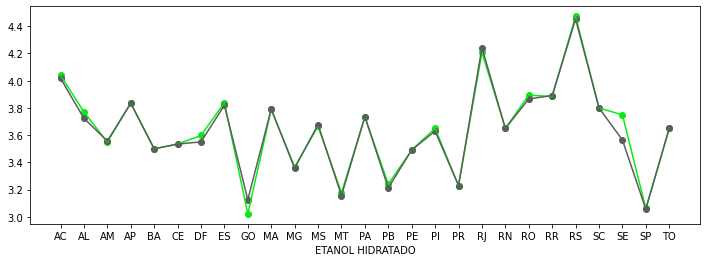

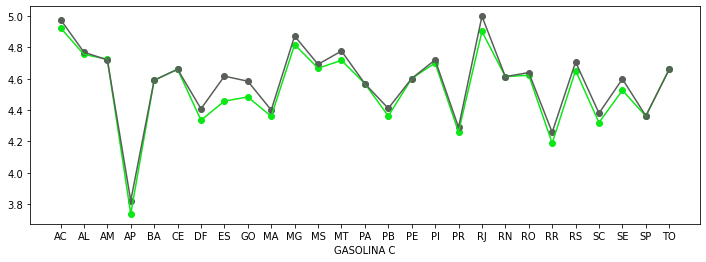

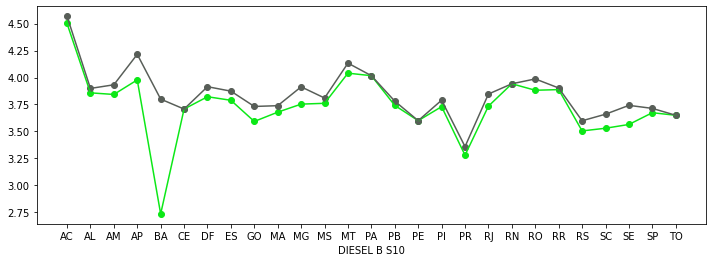

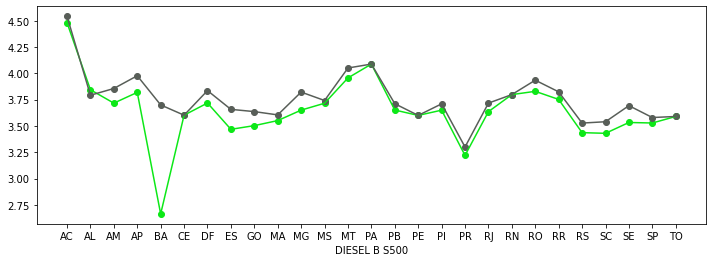

In [ ]:
#GRÁFICO ALTERAÇÕES PMPF
estados = quinzena_atual['UF']
grafico = quinzena_atual['AEHC']
estados_1 = quinzena_futuro['UF']
grafico_1 = quinzena_futuro['AEHC']

plt.figure(figsize=(12,4))
plt.xlabel('ETANOL HIDRATADO')

matplotlib.pyplot.plot(estados_1, grafico_1, color='#0CE817')
matplotlib.pyplot.scatter(estados_1, grafico_1, color='#0CE817')
matplotlib.pyplot.plot(estados, grafico, color='#585E58')
matplotlib.pyplot.scatter(estados, grafico, color='#585E58')
matplotlib.pyplot.show()

estados = quinzena_atual['UF']
grafico = quinzena_atual['GAC']
estados_1 = quinzena_futuro['UF']
grafico_1 = quinzena_futuro['GAC']

plt.figure(figsize=(12,4))
plt.xlabel('GASOLINA C')

matplotlib.pyplot.plot(estados_1, grafico_1, color='#0CE817')
matplotlib.pyplot.scatter(estados_1, grafico_1, color='#0CE817')
matplotlib.pyplot.plot(estados, grafico, color='#585E58')
matplotlib.pyplot.scatter(estados, grafico, color='#585E58')
matplotlib.pyplot.show()

estados = quinzena_atual['UF']
grafico = quinzena_atual['S10']
estados_1 = quinzena_futuro['UF']
grafico_1 = quinzena_futuro['S10']

plt.figure(figsize=(12,4))
plt.xlabel('DIESEL B S10')

matplotlib.pyplot.plot(estados_1, grafico_1, color='#0CE817')
matplotlib.pyplot.scatter(estados_1, grafico_1, color='#0CE817')
matplotlib.pyplot.plot(estados, grafico, color='#585E58')
matplotlib.pyplot.scatter(estados, grafico, color='#585E58')
matplotlib.pyplot.show()

estados = quinzena_atual['UF']
grafico = quinzena_atual['S500']
estados_1 = quinzena_futuro['UF']
grafico_1 = quinzena_futuro['S500']

plt.figure(figsize=(12,4))
plt.xlabel('DIESEL B S500')

matplotlib.pyplot.plot(estados_1, grafico_1, color='#0CE817')
matplotlib.pyplot.scatter(estados_1, grafico_1, color='#0CE817')
matplotlib.pyplot.plot(estados, grafico, color='#585E58')
matplotlib.pyplot.scatter(estados, grafico, color='#585E58')
matplotlib.pyplot.show()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



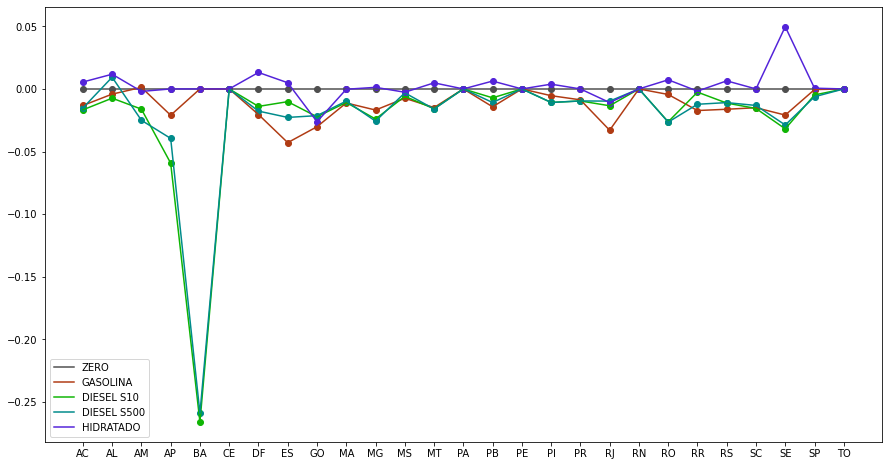

In [ ]:
quinzena_atual['Percentual'] = 0.00
zero = quinzena_atual['Percentual']

gasolina = quinzena_atual.groupby('UF')['GAC'].sum()
aliquota_gasolina = gasolina * quinzena_atual.groupby('UF')['ALÍQ. GAC'].sum()

gasolina_1 = quinzena_futuro.groupby('UF')['GAC'].sum()
aliquota_gasolina_1 = gasolina_1 * quinzena_futuro.groupby('UF')['ALÍQ. GAC'].sum()

valores = aliquota_gasolina_1 - aliquota_gasolina

s10 = quinzena_atual.groupby('UF')['S10'].sum()
aliquota_s10 = s10 * quinzena_atual.groupby('UF')['ALÍQ. S10'].sum()

s10_1 = quinzena_futuro.groupby('UF')['S10'].sum()
aliquota_s10_1 = s10_1 * quinzena_futuro.groupby('UF')['ALÍQ. S10'].sum()

valores_1 = aliquota_s10_1 - aliquota_s10

s500 = quinzena_atual.groupby('UF')['S500'].sum()
aliquota_s500 = s500 * quinzena_atual.groupby('UF')['ALÍQ. S500'].sum()

s500_1 = quinzena_futuro.groupby('UF')['S500'].sum()
aliquota_s500_1 = s500_1 * quinzena_futuro.groupby('UF')['ALÍQ. S500'].sum()

valores_2 = aliquota_s500_1 - aliquota_s500

aehc = quinzena_atual.groupby('UF')['AEHC'].sum()
aliquota_aehc = aehc * quinzena_atual.groupby('UF')['ALÍQ. AEHC'].sum()

aehc_1 = quinzena_futuro.groupby('UF')['AEHC'].sum()
aliquota_aehc_1 = aehc_1 * quinzena_futuro.groupby('UF')['ALÍQ. AEHC'].sum()

valores_3 = aliquota_aehc_1 - aliquota_aehc

plt.figure(figsize=(15,8))

matplotlib.pyplot.plot(estados, zero, color='#4F4F4F', label='ZERO')
matplotlib.pyplot.scatter(estados, zero, color='#4F4F4F')
matplotlib.pyplot.plot(estados, valores, color='#B03B13', label='GASOLINA')
matplotlib.pyplot.scatter(estados, valores, color='#B03B13')
matplotlib.pyplot.plot(estados,valores_1, color='#0FB504', label='DIESEL S10')
matplotlib.pyplot.scatter(estados,valores_1, color='#0FB504')
matplotlib.pyplot.plot(estados, valores_2, color='#008B8B', label='DIESEL S500')
matplotlib.pyplot.scatter(estados, valores_2, color='#008B8B')
matplotlib.pyplot.plot(estados, valores_3, color='#5323D9', label='HIDRATADO')
matplotlib.pyplot.scatter(estados, valores_3, color='#5323D9')

plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



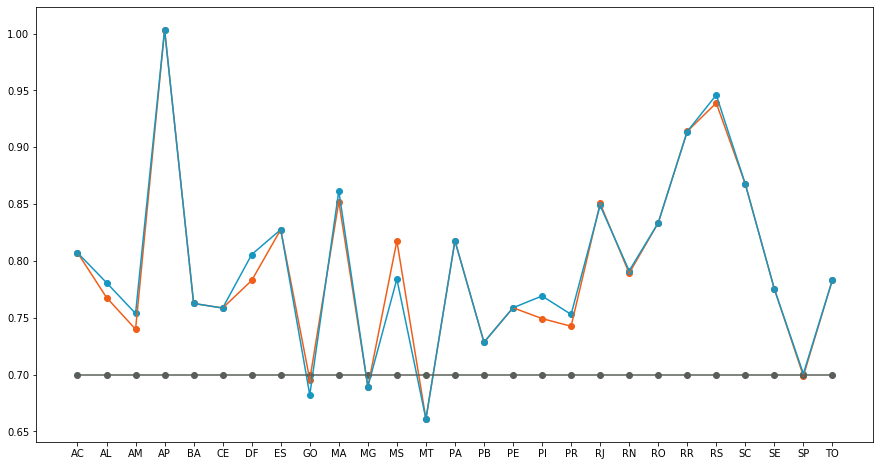

In [ ]:
#PERCENTUAL GASOLINA X HIDRATADO
percentual_gasolina = quinzena_atual['GAC']
percentual_hidratado = quinzena_atual['AEHC']

quinzena_atual['Percentual'] = 0.70
percentual = quinzena_atual['Percentual']

estado = quinzena_atual['UF']
valor = percentual_hidratado / percentual_gasolina

plt.figure(figsize=(15,8))

percentual_gasolina_1 = quinzena_futuro['GAC']
percentual_hidratado_1 = quinzena_futuro['AEHC']

quinzena_futuro['Percentual'] = 0.70
percentual = quinzena_futuro['Percentual']

estado_1 = quinzena_futuro['UF']
valor_1 = percentual_hidratado_1 / percentual_gasolina_1

matplotlib.pyplot.plot(estado, valor, color='#F05E1A')
matplotlib.pyplot.scatter(estado, valor, color='#F05E1A')
matplotlib.pyplot.plot(estado, valor_1, color='#1597C2')
matplotlib.pyplot.scatter(estado, valor_1, color='#1597C2')
matplotlib.pyplot.plot(estado, percentual, color='#585E58')
matplotlib.pyplot.scatter(estado, percentual, color='#585E58')
matplotlib.pyplot.show()